# Fitting a density model to the LMC isolated disk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
from modules import TimingTools as TT

## Reading data

In [2]:
r = np.load('./data/radial_distances.npy')
rho_r = np.load('./data/radial_density.npy')
e_rho_r = np.load('./data/radial_density_error.npy')

z = np.load('./data/vertical_distances.npy')
rho_z = np.load('./data/vertical_density.npy')
e_rho_z = np.load('./data/vertical_density_error.npy')

## Density model

In MakeGalaxy, the density profile of the disk is treated with an exponentially declining parameterization along the radial direction, and a $sech^2$ parametrization along the vertical direction. The model looks like:

\begin{equation}
log(\rho(r, z)) = log(\rho_0) - \frac{r}{H \: ln(10)} + 2 \: log\left(sech\left(\frac{z}{z_0}\right)\right),
\end{equation}
where $H$ is the scale length along the radial direction and $z_0$ is the scale length along the vertical direction. $\rho_0$ denotes the central density. $\rho_0$ is measured in $M_\odot$ kpc$^{-3}$, and all lengths are measured in kpc.

Since, the model is separable in $r$ and $z$, we shall fit the radial and vertical direction independently. This is a good approximation, since the radial and vertical scale lengths can be specified independently while initializing the disk.

## Fitting

We use the scipy.optimize.curvefit package to perform the fitting. The algorithm minimizes the following statistic:
\begin{equation}
\chi^2 = \sum_{i} \left(\frac{\log(\rho_{meas}) - log(\rho_{pred})}{\sigma_{log(\rho_{meas})}}\right)^2
\end{equation}

### Radial fitting

For fitting, we give the bounds, $log(\rho_0) \in [7, 10]$, $H \in [0, 6]$. The initial guesses are $8.5$ and $3$ respectively.

In [3]:
logrho_r = np.log10(rho_r)
e_logrho_r = e_rho_r/(rho_r*np.log(10))

In [4]:
popt_rad, pcov_rad = cf(TT.log_rad_density, r, logrho_r, p0 = [8.5, 3], bounds = ([7, 0], [10, 6])
                       , sigma = e_logrho_r)

In [5]:
logrho0_fit, H_fit = np.round(popt_rad, 2)
sigma_logrho0_fit = np.round(np.sqrt(pcov_rad[0,0]), 2)
sigma_H_fit = np.round(np.sqrt(pcov_rad[1,1]), 2)

In [6]:
print('logrho0 = ' + str(logrho0_fit) + ' +- ' + str(sigma_logrho0_fit) + ' in log(Msun/kpc^3)')
print('H_fit = ' + str(H_fit) + ' +- ' + str(sigma_H_fit) + ' kpc')

logrho0 = 8.21 +- 0.01 in log(Msun/kpc^3)
H_fit = 1.75 +- 0.02 kpc


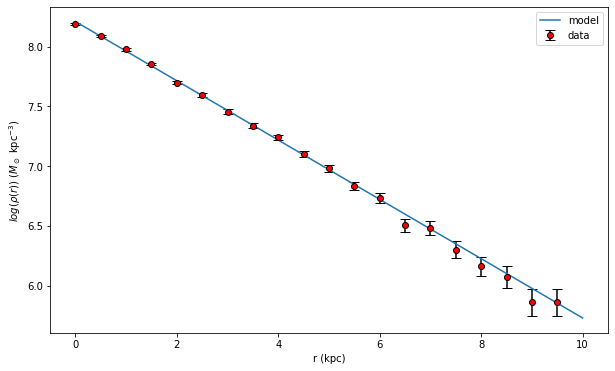

In [8]:
r_arr = np.linspace(0, 10, 100)
logrho_r_pred = TT.log_rad_density(r_arr, logrho0_fit, H_fit)

plt.figure(figsize = (10,6))
plt.errorbar(r, logrho_r, yerr = e_logrho_r, ecolor = 'black', capsize = 5, 
             fmt = 'o', color = 'r', markeredgecolor = 'black', label = 'data')
plt.plot(r_arr, logrho_r_pred, label = 'model')
plt.xlabel('r (kpc)')
plt.ylabel(r'$log(\rho(r))$ ($M_\odot$ kpc$^{-3}$)')
plt.legend()
plt.show()

## Vertical fitting

For fitting, we give the bounds, $log(\rho_0) \in [8.18, 8.24]$, $z_0 \in [0, 1]$. The initial guesses are $8.21$ and $0.5$ respectively. For $log(\rho_0)$, the bounds are in $\pm 3\sigma$ of the value obtained using the fitting of the radial density profile.

In [9]:
logrho_z = np.log10(rho_z)
e_logrho_z = e_rho_z/(rho_z*np.log(10))

In [10]:
popt_vert, pcov_vert = cf(TT.log_vert_density, z, logrho_z, p0 = [8.21, 0.5], bounds = ([8.18, 0], [8.24, 1])
                         , sigma = e_logrho_z)

In [11]:
logrho0_vert_fit, z0_fit = np.round(popt_vert, 3)
sigma_z0_fit = np.round(np.sqrt(pcov_vert[1,1]), 3)

In [12]:
print('z0_fit = ' + str(z0_fit) + ' +- ' + str(sigma_z0_fit) + ' kpc')

z0_fit = 0.317 +- 0.004 kpc


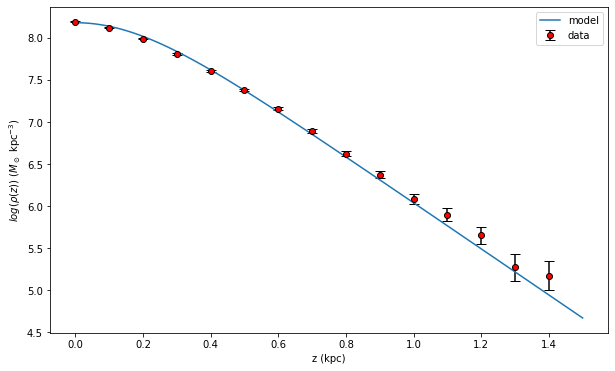

In [13]:
z_arr = np.linspace(0, 1.5, 100)
logrho_z_pred = TT.log_vert_density(z_arr, logrho0_vert_fit, z0_fit)

plt.figure(figsize = (10,6))
plt.errorbar(z, logrho_z, yerr = e_logrho_z, ecolor = 'black', capsize = 5, 
             fmt = 'o', color = 'r', markeredgecolor = 'black', label = 'data')
plt.plot(z_arr, logrho_z_pred, label = 'model')
plt.xlabel('z (kpc)')
plt.ylabel(r'$log(\rho(z))$ ($M_\odot$ kpc$^{-3}$)')
plt.legend()
plt.show()

## Saving results

In [14]:
#density_profile_params = np.array([logrho0_fit, sigma_logrho0_fit, H_fit, sigma_H_fit, z0_fit, sigma_z0_fit])
#np.save('./data/density_profile_params', density_profile_params)